# Pengenalan kepada Kebarangkalian dan Statistik
Dalam buku nota ini, kita akan meneroka beberapa konsep yang telah kita bincangkan sebelum ini. Banyak konsep daripada kebarangkalian dan statistik diwakili dengan baik dalam perpustakaan utama untuk pemprosesan data dalam Python, seperti `numpy` dan `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Pembolehubah Rawak dan Taburan
Mari kita mulakan dengan mengambil sampel sebanyak 30 nilai daripada taburan seragam dari 0 hingga 9. Kita juga akan mengira min dan varians.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Untuk menganggar secara visual berapa banyak nilai berbeza yang terdapat dalam sampel, kita boleh plot **histogram**:


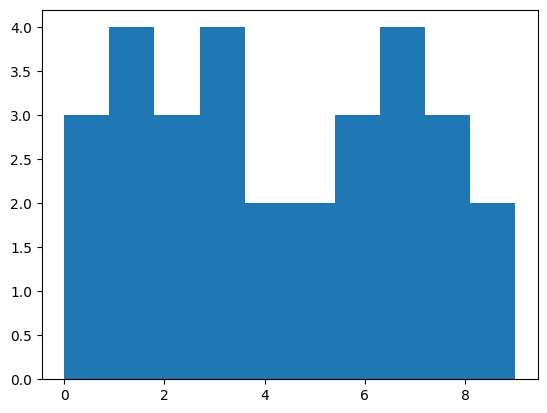

In [119]:
plt.hist(sample)
plt.show()

## Menganalisis Data Sebenar

Min dan varians sangat penting apabila menganalisis data dunia sebenar. Mari kita muatkan data tentang pemain besbol daripada [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Kita menggunakan pakej yang dipanggil [**Pandas**](https://pandas.pydata.org/) di sini untuk analisis data. Kita akan berbincang lebih lanjut tentang Pandas dan bekerja dengan data dalam Python kemudian dalam kursus ini.

Mari kita kira nilai purata untuk umur, ketinggian, dan berat:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Sekarang mari kita fokus pada ketinggian, dan hitung sisihan piawai dan varians:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Sebagai tambahan kepada min, adalah masuk akal untuk melihat nilai median dan kuartil. Ia boleh digambarkan menggunakan **graf kotak**:


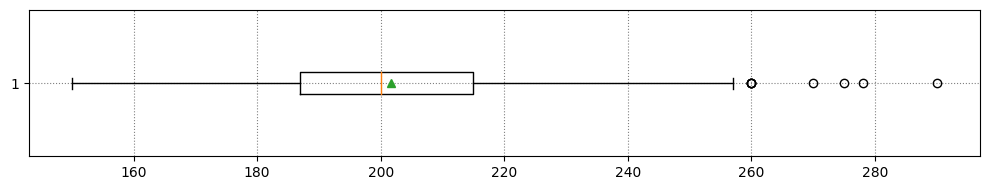

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Kita juga boleh membuat plot kotak bagi subset set data kita, contohnya, dikelompokkan mengikut peranan pemain.


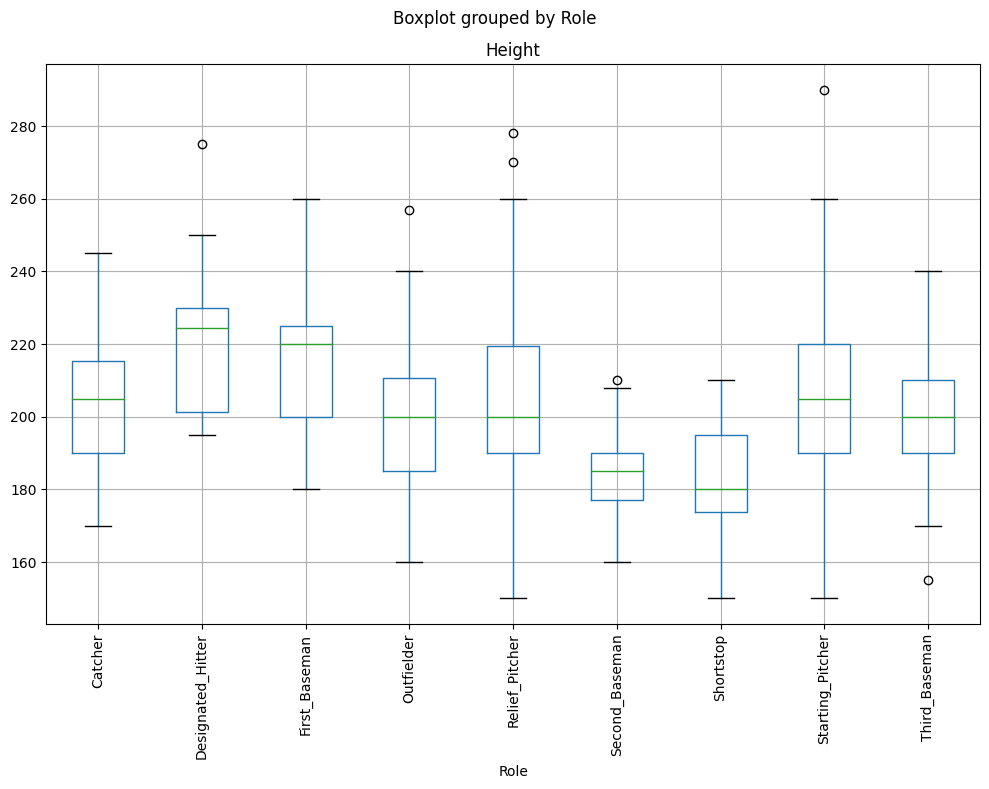

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Nota**: Rajah ini mencadangkan bahawa, secara purata, ketinggian pemain base pertama lebih tinggi daripada ketinggian pemain base kedua. Kemudian kita akan belajar bagaimana untuk menguji hipotesis ini dengan lebih formal, dan bagaimana untuk menunjukkan bahawa data kita adalah signifikan secara statistik untuk membuktikannya.

Umur, ketinggian, dan berat badan semuanya adalah pemboleh ubah rawak berterusan. Apa pendapat anda tentang taburan mereka? Cara yang baik untuk mengetahuinya adalah dengan melukis histogram nilai:


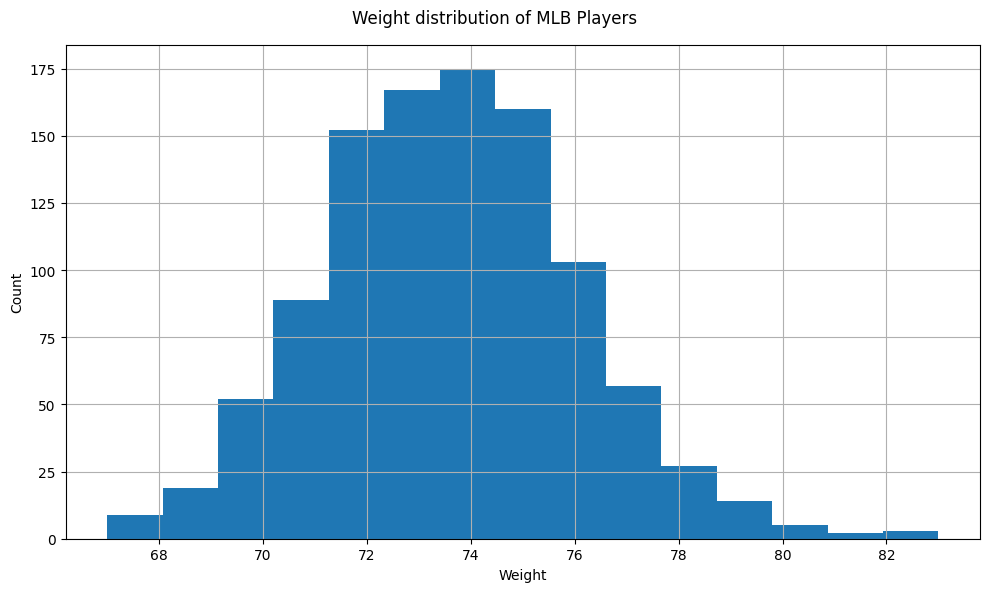

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Taburan Normal

Mari kita cipta sampel berat buatan yang mengikuti taburan normal dengan min dan varians yang sama seperti data sebenar kita:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

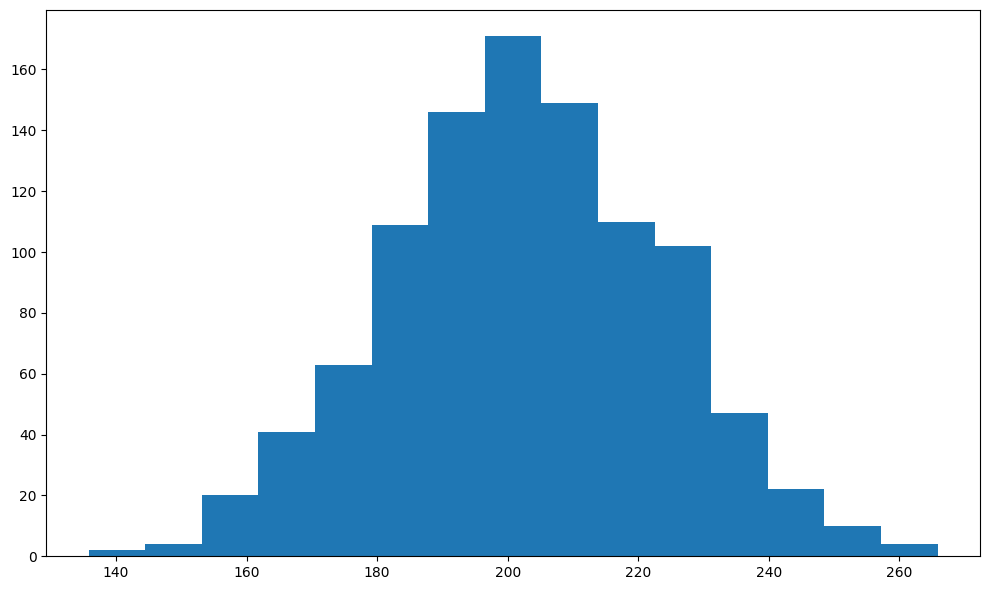

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

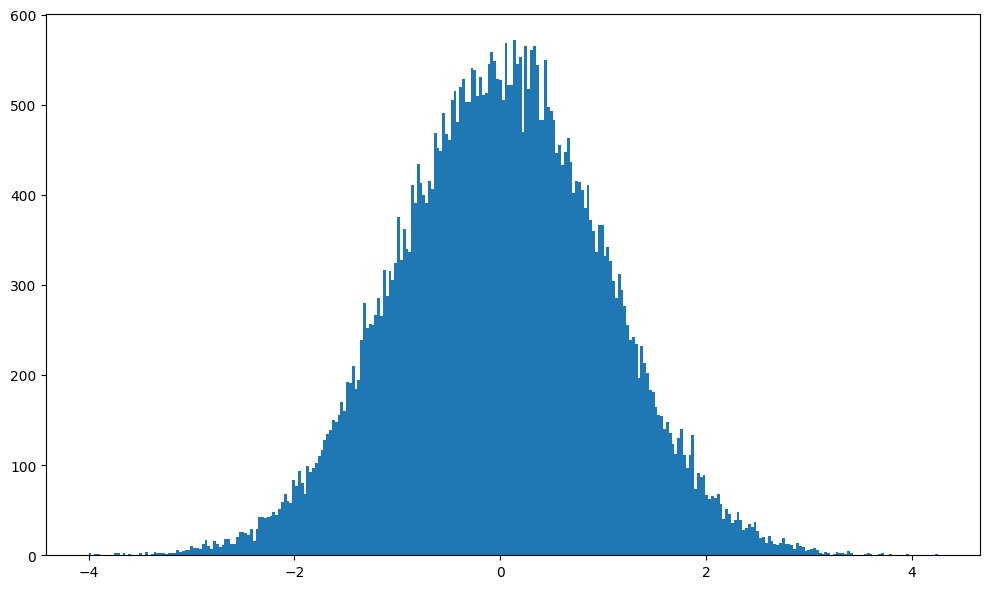

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Oleh kerana kebanyakan nilai dalam kehidupan sebenar diedarkan secara normal, kita tidak sepatutnya menggunakan penjana nombor rawak seragam untuk menjana data sampel. Berikut adalah apa yang berlaku jika kita cuba menjana berat dengan taburan seragam (dijana oleh `np.random.rand`):


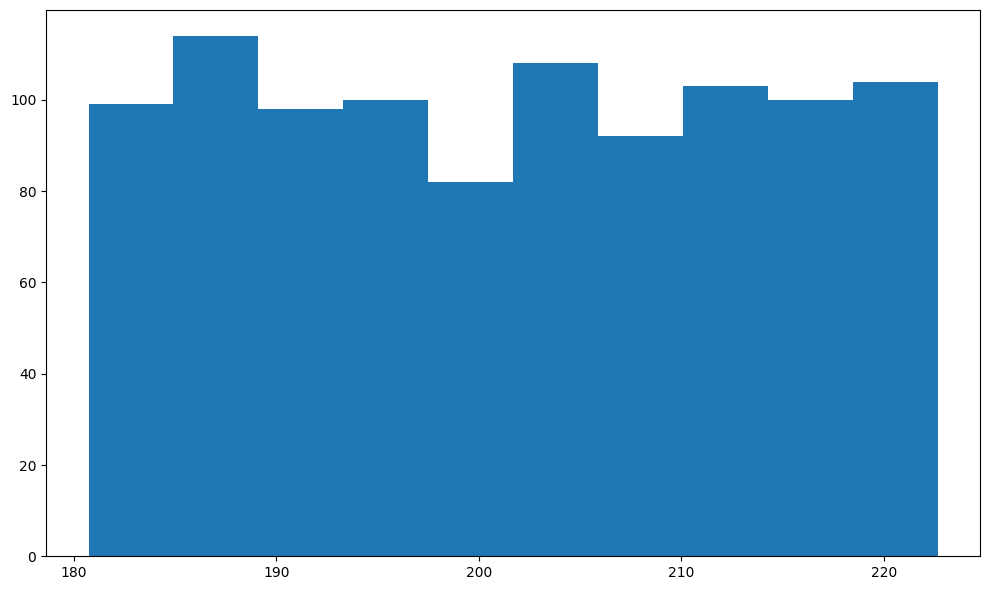

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Selang Keyakinan

Mari kita kira selang keyakinan untuk berat dan tinggi pemain besbol. Kita akan menggunakan kod [daripada perbincangan stackoverflow ini](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Ujian Hipotesis

Mari kita terokai pelbagai peranan dalam set data pemain besbol kita:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Kita dapat melihat bahawa selang masa tidak bertindih.

Cara yang lebih tepat secara statistik untuk membuktikan hipotesis adalah dengan menggunakan **Ujian-t Student**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Dua nilai yang dikembalikan oleh fungsi `ttest_ind` adalah:  
* p-value boleh dianggap sebagai kebarangkalian dua taburan mempunyai min yang sama. Dalam kes kita, ia sangat rendah, yang bermaksud terdapat bukti kukuh menyokong bahawa pemain base pertama lebih tinggi.  
* t-value ialah nilai perantaraan bagi perbezaan min yang dinormalisasi yang digunakan dalam ujian-t, dan ia dibandingkan dengan nilai ambang untuk tahap keyakinan tertentu.  


## Mensimulasikan Taburan Normal dengan Teorem Had Pusat

Penjana pseudo-rawak dalam Python direka untuk memberikan kita taburan seragam. Jika kita ingin mencipta penjana untuk taburan normal, kita boleh menggunakan teorem had pusat. Untuk mendapatkan nilai yang bertaburan secara normal, kita hanya perlu mengira purata daripada sampel yang dijana secara seragam.


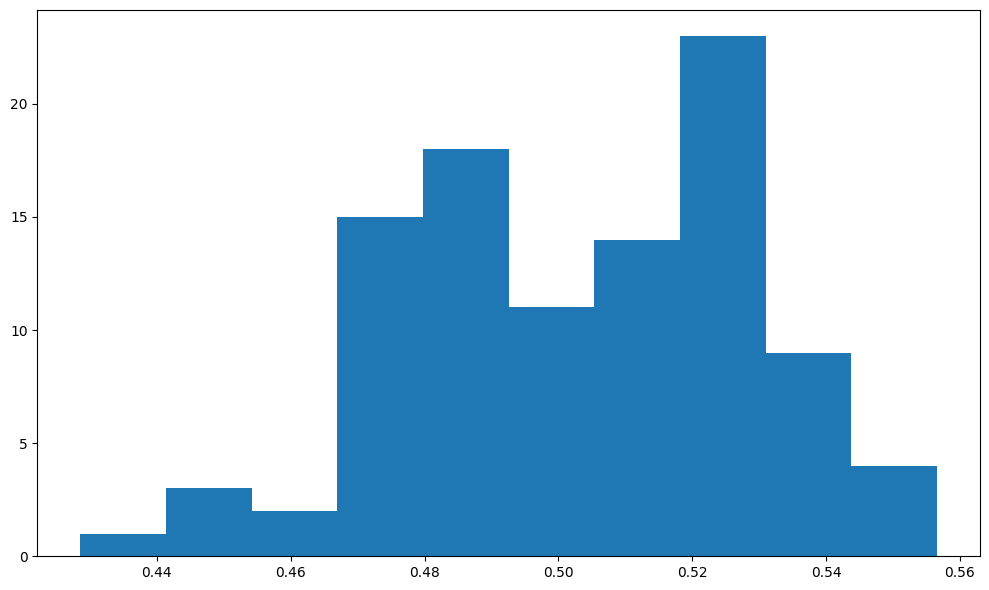

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelasi dan Korporasi Besbol Jahat

Korelasi membolehkan kita mencari hubungan antara urutan data. Dalam contoh mainan kita, mari kita bayangkan terdapat sebuah korporasi besbol jahat yang membayar pemainnya berdasarkan ketinggian mereka - semakin tinggi pemain itu, semakin banyak wang yang dia dapat. Katakan terdapat gaji asas sebanyak $1000, dan bonus tambahan dari $0 hingga $100, bergantung pada ketinggian. Kita akan mengambil pemain sebenar dari MLB, dan mengira gaji khayalan mereka:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Mari kita kira kovarians dan korelasi bagi jujukan tersebut. `np.cov` akan memberikan kita **matriks kovarians**, yang merupakan lanjutan kovarians kepada pelbagai pemboleh ubah. Elemen $M_{ij}$ dalam matriks kovarians $M$ adalah korelasi antara pemboleh ubah input $X_i$ dan $X_j$, dan nilai diagonal $M_{ii}$ adalah varians bagi $X_{i}$. Begitu juga, `np.corrcoef` akan memberikan kita **matriks korelasi**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Hubungan sama dengan 1 bermaksud terdapat **hubungan linear** yang kuat antara dua pemboleh ubah. Kita boleh melihat hubungan linear secara visual dengan melukis satu nilai terhadap yang lain:


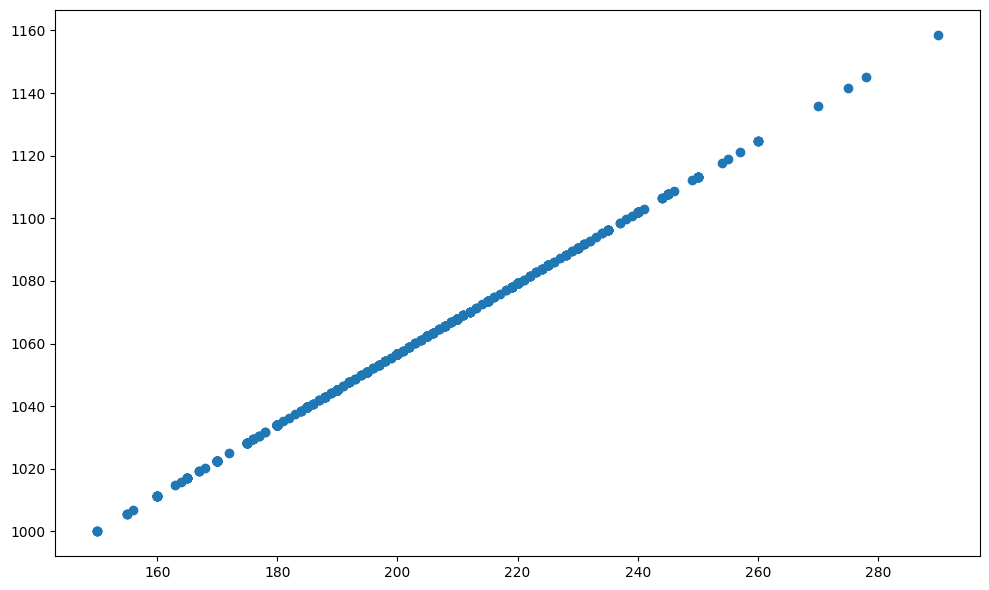

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Mari kita lihat apa yang berlaku jika hubungan tersebut tidak linear. Katakan bahawa syarikat kita memutuskan untuk menyembunyikan kebergantungan linear yang jelas antara ketinggian dan gaji, dan memperkenalkan beberapa ketidaklinearan ke dalam formula, seperti `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Dalam kes ini, korelasi adalah sedikit lebih kecil, tetapi ia masih agak tinggi. Sekarang, untuk menjadikan hubungan itu kurang jelas, kita mungkin mahu menambah sedikit keacakan dengan menambah beberapa pemboleh ubah rawak kepada gaji. Mari kita lihat apa yang berlaku:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


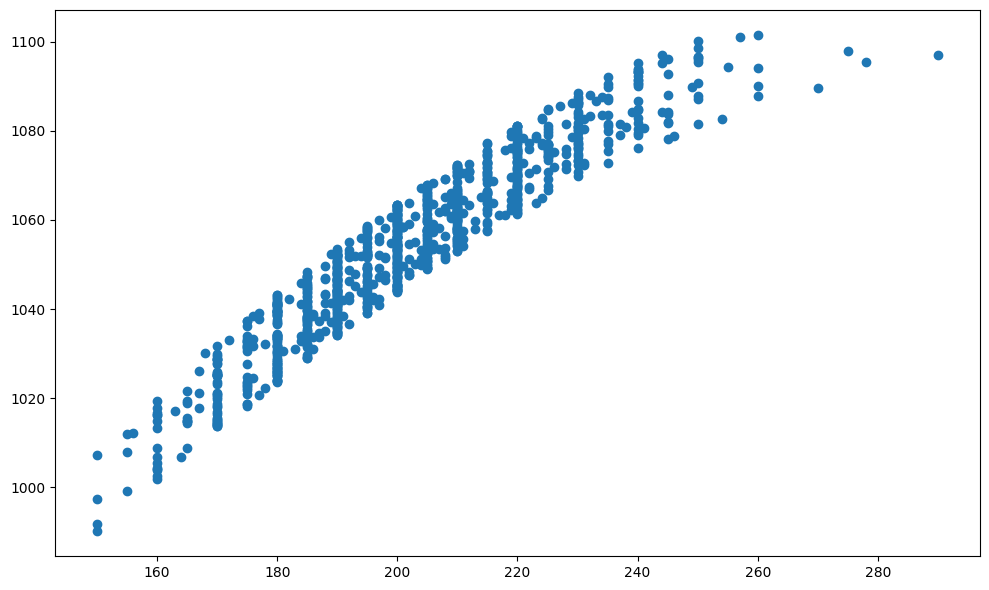

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Bolehkah anda meneka mengapa titik-titik ini berbaris menjadi garisan menegak seperti ini?

Kami telah memerhatikan hubungan antara konsep yang direka secara buatan seperti gaji dan pemboleh ubah yang diperhatikan *ketinggian*. Mari kita lihat juga jika dua pemboleh ubah yang diperhatikan, seperti ketinggian dan berat, turut berkorelasi:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Malangnya, kami tidak mendapat sebarang hasil - hanya beberapa nilai `nan` yang pelik. Ini disebabkan oleh fakta bahawa beberapa nilai dalam siri kami tidak ditakrifkan, diwakili sebagai `nan`, yang menyebabkan hasil operasi juga tidak ditakrifkan. Dengan melihat matriks, kita dapat melihat bahawa `Weight` adalah kolum yang bermasalah, kerana korelasi diri antara nilai `Height` telah dikira.

> Contoh ini menunjukkan kepentingan **penyediaan data** dan **pembersihan data**. Tanpa data yang betul, kita tidak dapat mengira apa-apa.

Mari gunakan kaedah `fillna` untuk mengisi nilai yang hilang, dan kira korelasi:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

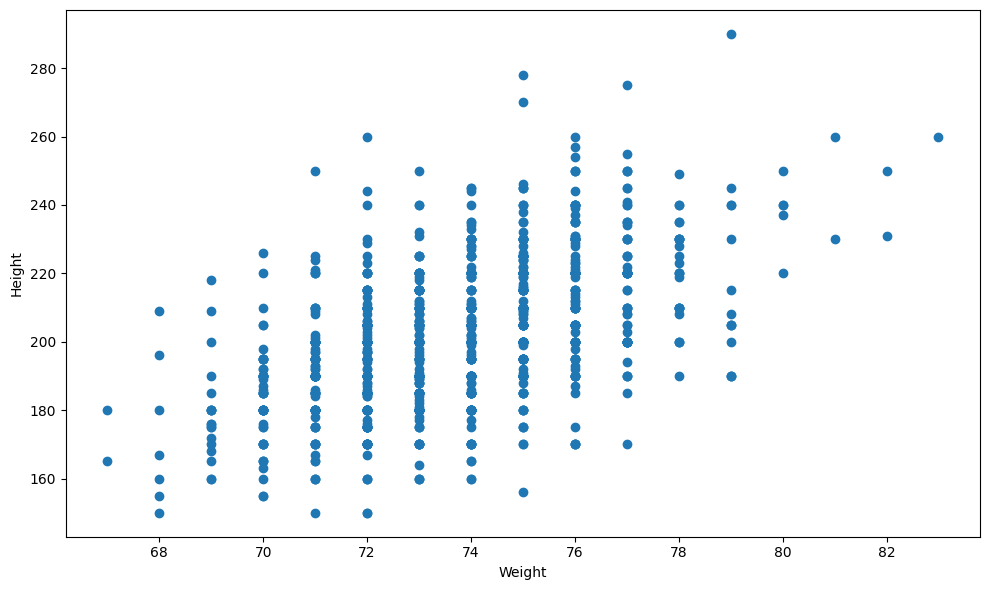

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Kesimpulan

Dalam notebook ini, kita telah mempelajari cara melaksanakan operasi asas pada data untuk mengira fungsi statistik. Kita kini tahu cara menggunakan alat matematik dan statistik yang kukuh untuk membuktikan beberapa hipotesis, serta cara mengira selang keyakinan untuk pemboleh ubah sewenang-wenangnya berdasarkan sampel data.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat yang kritikal, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
